# Machine Learning Visualization Tools

While `scikit-learn` includes a rich selection of model diagnostic and selection tools, model evaluation is often aided by the generation of visualizations, particularly when there are a large number of features involved. This short tutorial introduces the [YellowBrick](http://www.scikit-yb.org) package, which extends the scikit-learn API with visual analysis and diagnostic tools. The Yellowbrick API also wraps matplotlib to generate figures and interactive data explorations while still allowing developers fine-grain control of figures. For users, Yellowbrick can help evaluate the performance, stability, and predictive value of machine learning models and assist in diagnosing problems throughout the machine learning workflow.

In [4]:
%matplotlib inline
import pandas as pd
import warnings
import numpy as np

warnings.simplefilter('ignore')

Anscombe's quartet illustrates why visualization is important for model evaluation!

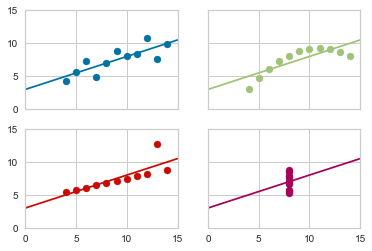

In [5]:
import yellowbrick as yb
import matplotlib.pyplot as plt

g = yb.anscombe()
plt.show()

## Visualizers

Yellowbrick extends the Scikit-Learn API with a new core object: the Visualizer. Visualizers allow visual models to be fit and transformed as part of the Scikit-Learn Pipeline process, providing visual diagnostics throughout the transformation of high dimensional data.

`Rank1D` and `Rank2D` evaluate single features or pairs of features using a variety of metrics that score the features along the range [-1, 1] or [0, 1], thereby allowing them to be ranked. A similar concept to scatterplot matrices (SPLOM), the scores are displayed on a lower triangular heatmap so that patterns between pairs of features can be easily discerned for downstream analysis

In [6]:
# Load the data set
data = pd.read_csv('../data/credit.csv')

# Specify the features of interest
features = [
        'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
        'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
        'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
        'jul_pay', 'aug_pay', 'sep_pay',
    ]

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.default.as_matrix()

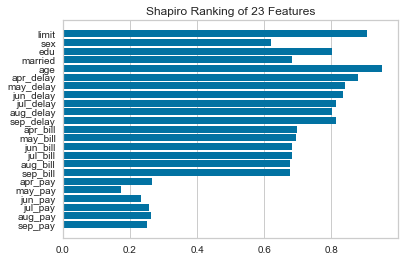

In [7]:
from yellowbrick.utils import is_dataframe
from yellowbrick.features.base import FeatureVisualizer
from yellowbrick.exceptions import YellowbrickValueError
from yellowbrick.style.colors import resolve_colors, get_color_cycle
from yellowbrick.features.rankd import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=features, algorithm='shapiro')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

A two dimensional ranking of features in `Rank2D` applies a ranking algorithm that relates features pair-wise (covariance, by default).

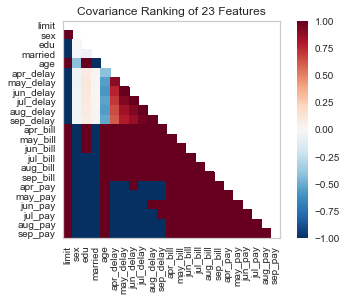

In [8]:
from yellowbrick.features.rankd import Rank2D

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

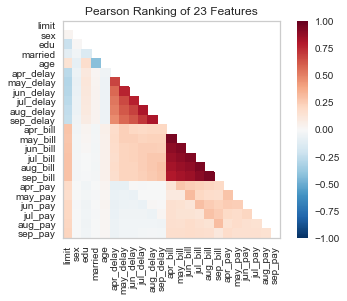

In [9]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

A joint plot visualizer plots a feature against the target and shows the distribution of each via a histogram on each axis.

In [10]:
# Load the data
df = pd.read_csv('../data/concrete.csv')
feature = 'cement'
target = 'strength'

# Get the X and y data from the DataFrame
X = df[feature]
y = df[target]

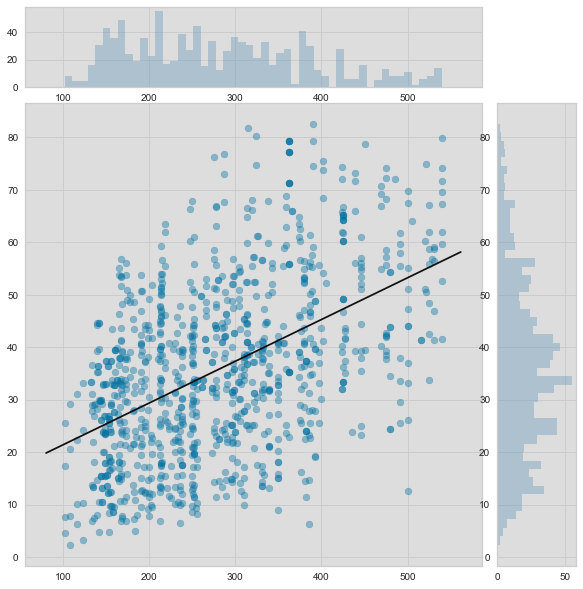

In [11]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(feature=feature, target=target)

visualizer.fit(X, y)
visualizer.poof()

Where the density of points is large, hexbins can be used to plot the data.

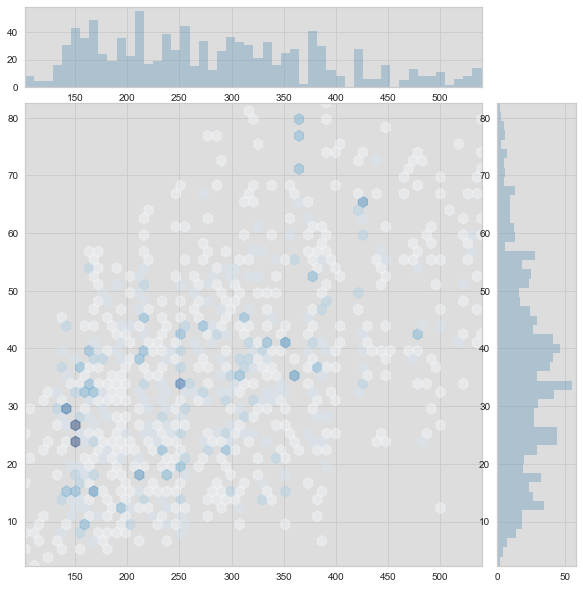

In [12]:
visualizer = JointPlotVisualizer(
    feature=feature, target=target, joint_plot='hex'
)

visualizer.fit(X, y)
visualizer.poof()

## Regression evaluation

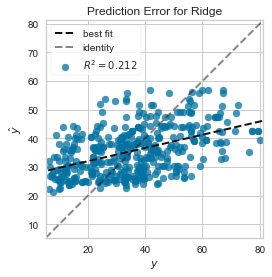

In [13]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df[[feature]], y, test_size=400
)

visualizer = PredictionError(Ridge(alpha=3.612))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

### Visualization of test-set errors

Using YellowBrick we can show the residuals (difference between the predicted value and the truth) both for the training set and the testing set (respectively blue and green).

If the training and testing residuals had a different distribution it might indicate various problems:

- small training residuals and large testing residuals might indicate over-fitting
- differing distributions of values along the x axis might suggest that the training and testing values don't represent similar samples
- the size of the residuals at certain points in the range might be very-wrong suggesting poor model convergence in these areas

In [14]:
# Load the data
df = pd.read_csv('../data/concrete.csv')
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

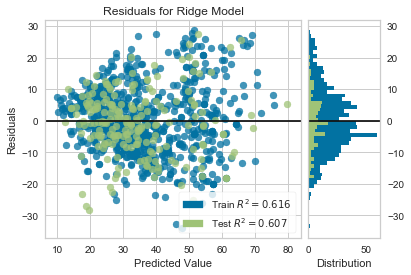

In [15]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

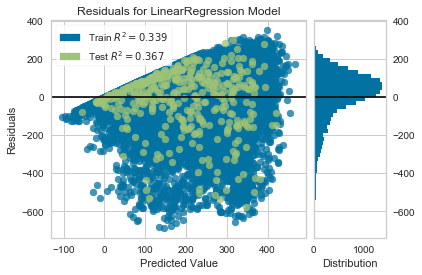

In [16]:
from sklearn.linear_model import LinearRegression

data = pd.read_csv('../data/bikeshare.csv')
X = data[[
    "season", "month", "hour", "holiday", "weekday", "workingday",
    "weather", "temp", "feelslike", "humidity", "windspeed"
]]
y = data["riders"]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=400
)

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

### Tuning regularization

Regularization is designed to penalize model complexity, therefore the higher the alpha, the less complex the model, decreasing the error due to variance (overfitting). Alphas that are too high on the other hand increase the error due to bias (underfitting). It is important, therefore to choose an optimal alpha such that the error is minimized in both directions.

The `AlphaSelection` Visualizer demonstrates how different values of alpha influence model selection during the regularization of linear models.

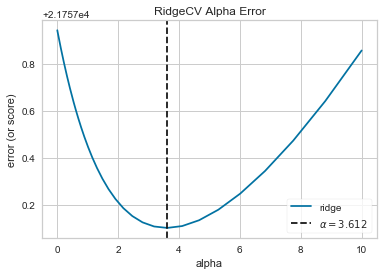

In [17]:
from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, y)
visualizer.poof()

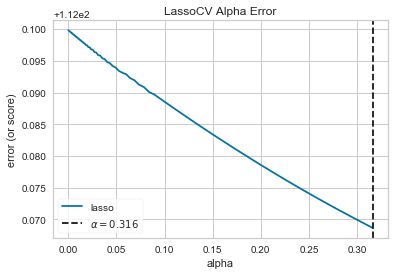

In [18]:
from sklearn.linear_model import LassoCV

df = pd.read_csv('../data/concrete.csv')
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a list of alphas to cross-validate against
alphas = np.logspace(-12, -0.5, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
g = visualizer.poof()             # Draw/show/poof the data

## Example: Classifying poisonous mushrooms

We will use a new sample dataset to demonstrate a viable model development pipeline. The data include descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species was identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended (this latter class was combined with the poisonous one). The objective is to build a model for classifying the mushrooms based on their physical characteristics.

In [19]:
import os
import pandas as pd

names = [
    'class',
    'cap-shape',
    'cap-surface',
    'cap-color'
]

dataset = pd.read_csv('../data/mushroom.csv')
dataset.columns = names
dataset.head()

,class,cap-shape,cap-surface,cap-color
0,edible,convex,smooth,yellow
1,edible,bell,smooth,white
2,poisonous,convex,scaly,white
3,edible,convex,smooth,gray
4,edible,convex,scaly,yellow


In [20]:
features = ['cap-shape', 'cap-surface', 'cap-color']
target   = ['class']

X = dataset[features]
y = dataset[target]

To facilitate the development of custom machine learning classes, scikit-learn provides templates in the form of `Mixin` classes that allows for easy subclassing of the major classes, so that new classes conform to the scikit-learn API. For example, we can create a custom encoder by inheriting from `BaseEstimator` (the parent class of all scikit-learn estimators) and the `TransformerMixin`, which provides hooks into the `fit` and `transform` methods. All that is required from the user is the specification of these methods to implement the custom transformation of interest.

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """

    def __init__(self, columns=None):
        self.columns  = [col for col in columns]
        self.encoders = None

    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns

        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns
        }
        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])

        return output

Our data is categorical, so we will need to encode these variables as numeric values for machine learning. As we know, sckit-learn provides a `LabelEncoder` transformer for converting categorical labels into numeric integers, but it can only transform a single vector at a time, so we’ll have to adapt it in order to apply it to multiple columns.

By inheriting from the scikit-learn classes, our new encoder class can be used in the creation of a model selection pipeline. This process will include:

- encoding categorical variables in the dataset
- performing one-hot encoding on the categorical variables
- applying the resulting encoded dataset to a particular estimator
- returning a relevant metric for performing model selection

Since we are doing binary classification, we will use the Brier score for model evaluation.

In [22]:
from sklearn.metrics import brier_score_loss
from sklearn.pipeline import Pipeline


def model_selection(X, y, estimator, metric=brier_score_loss):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())),
         ('one_hot_encoder', OneHotEncoder()),
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y)

    expected  = y
    predicted = model.predict(X)

    # Compute and return the F1 score (the harmonic mean of precision and recall)
    return (metric(expected, predicted))

In [23]:
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [24]:
model_selection(X, y, LinearSVC())

0.3349747630185892

In [25]:
model_selection(X, y, NuSVC())

0.30333620583528254

In [26]:
model_selection(X, y, SVC())

0.32032500307768064

In [27]:
model_selection(X, y, SGDClassifier())

0.3789240428413148

In [28]:
model_selection(X, y, KNeighborsClassifier())

0.3118306044564816

In [29]:
model_selection(X, y, LogisticRegressionCV())

0.3349747630185892

In [30]:
model_selection(X, y, LogisticRegression())

0.3352209774713776

In [31]:
model_selection(X, y, BaggingClassifier())

0.2852394435553367

In [32]:
model_selection(X, y, ExtraTreesClassifier())

0.28474701464975993

In [33]:
model_selection(X, y, RandomForestClassifier())

0.2853625507817309

Now let’s refactor our model evaluation function to use Yellowbrick’s `ClassificationReport` class, a visualizer that displays the precision, recall, and F1 scores. 

> The F1 score is a measure of a test’s accuracy. It considers both the precision and the recall of the test to compute the score. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0.

This visual model analysis tool integrates numerical scores as well as color-coded heatmaps in order to support easy interpretation and detection, particularly the nuances of Type I and Type II error.

In [34]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visual_model_selection(X, y, estimator):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())),
         ('one_hot_encoder', OneHotEncoder()),
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(model, classes=['edible', 'poisonous'])
    visualizer.fit(X, y)
    visualizer.score(X, y)
    visualizer.poof()

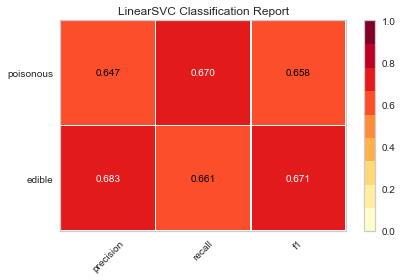

In [35]:
visual_model_selection(X, y, LinearSVC())

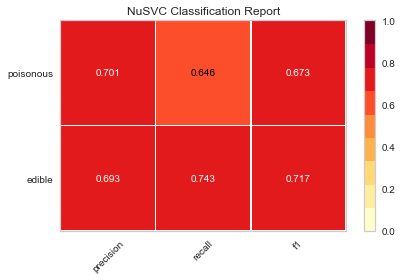

In [36]:
visual_model_selection(X, y, NuSVC())

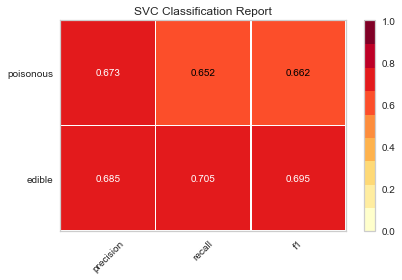

In [37]:
visual_model_selection(X, y, SVC())

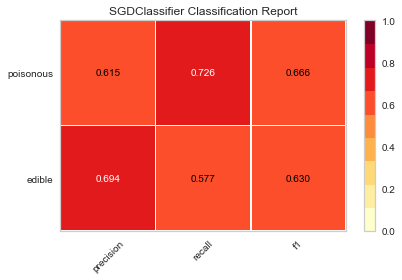

In [38]:
visual_model_selection(X, y, SGDClassifier())

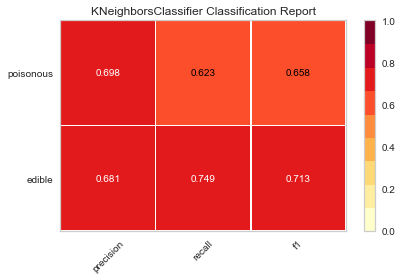

In [39]:
visual_model_selection(X, y, KNeighborsClassifier())

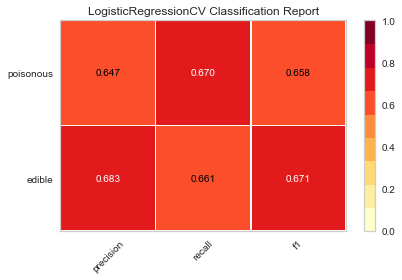

In [40]:
visual_model_selection(X, y, LogisticRegressionCV())

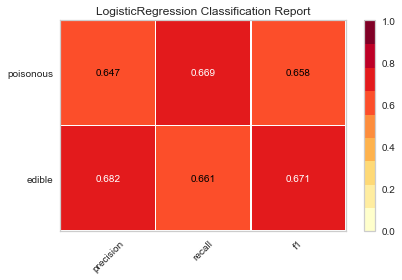

In [41]:
visual_model_selection(X, y, LogisticRegression())

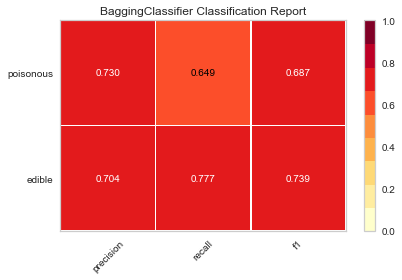

In [42]:
visual_model_selection(X, y, BaggingClassifier())

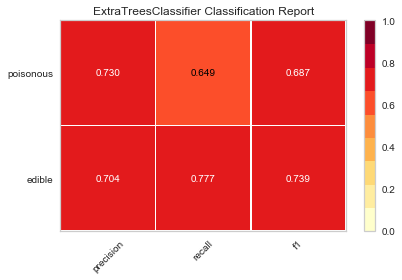

In [43]:
visual_model_selection(X, y, ExtraTreesClassifier())

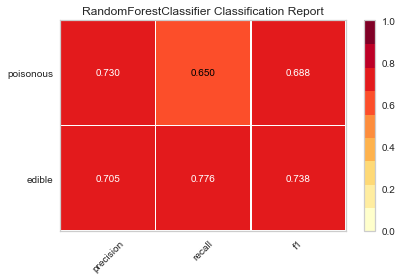

In [44]:
visual_model_selection(X, y, RandomForestClassifier())

## Confusion Matrices

The `ConfusionMatrix` visualizer is a `ScoreVisualizer` that takes a fitted scikit-learn classifier and a set of test X and y values and returns a report showing how each of the test values predicted classes compare to their actual classes. Data scientists use confusion matrices to understand which classes are most easily confused. These provide similar information as what is available in a `ClassificationReport`, but rather than top-level scores, they provide deeper insight into the classification of individual data points.

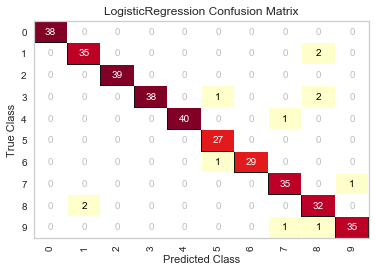

In [45]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits

# We'll use the handwritten digits data set from scikit-learn.
# Each feature of this dataset is an 8x8 pixel image of a handwritten number.
# Digits.data converts these 64 pixels into a single array of features
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=11)

model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

#How did we do?
cm.poof()

## Feature analysis

In [46]:
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pcoords import ParallelCoordinates
from yellowbrick.features.pca import PCADecomposition

**RadViz** is a multivariate data visualization algorithm that plots each feature dimension uniformly around the circumference of a circle then plots points on the interior of the circle such that the point normalizes its values on the axes from the center to each arc. This mechanism allows as many dimensions as will easily fit on a circle, greatly expanding the dimensionality of the visualization.

Data scientists use this method to detect separability between classes. E.g. is there an opportunity to learn from the feature set or is there just too much noise?

This example uses experimental data for binary classification (room occupancy) from Temperature, Humidity, Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.

In [47]:
# Load the classification data set
data = pd.read_csv('../data/occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

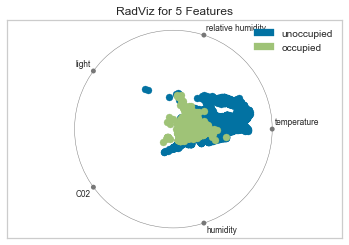

In [48]:
# Import the visualizer
from yellowbrick.features import RadViz

# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

**Parallel coordinates** is multi-dimensional feature visualization technique where the vertical axis is duplicated horizontally for each feature. Instances are displayed as a single line segment drawn from each vertical axes to the location representing their value for that feature. This allows many dimensions to be visualized at once.

This technique can be used to detect clusters of instances that have similar classes, and to note features that have high variance or different distributions. 

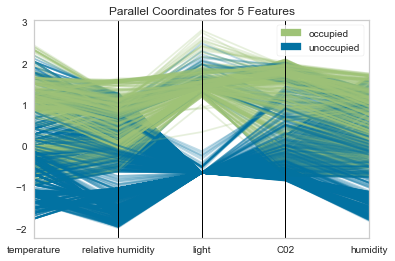

In [49]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=features, normalize='standard', sample = 0.1)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

By inspecting the visualization closely, we can see that the combination of transparency and overlap gives us the sense of groups of similar instances, sometimes referred to as *braids*. If there are distinct braids of different classes, it suggests that there is enough separability that a classification algorithm might be able to discern between each class.

The PCA Decomposition visualizer utilizes principal component analysis to decompose high dimensional data into two or three dimensions so that each instance can be plotted in a scatter plot. The use of PCA means that the projected dataset can be analyzed along axes of principal variation and can be interpreted to determine if spherical distance metrics can be utilized.

In [50]:
# Load the classification data set
data = pd.read_csv('../data/credit.csv')

# Specify the features of interest
features = [
    'limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
    'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill', 'may_bill',
    'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay', 'may_pay', 'jun_pay',
    'jul_pay', 'aug_pay', 'sep_pay',
]

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.default.as_matrix()

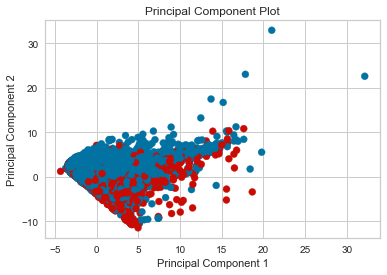

In [51]:
# Create a list of colors to assign to points in the plot
colors = np.array(['r' if yi else 'b' for yi in y])

visualizer = PCADecomposition(scale=True, center=False, color=colors)
visualizer.fit_transform(X,y)
visualizer.poof()

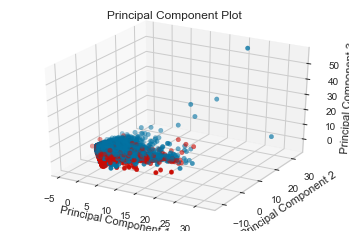

In [52]:
visualizer = PCADecomposition(scale=True, center=False, color=colors, proj_dim=3)
visualizer.fit_transform(X,y)
visualizer.poof()

The PCA projection can be enhanced to a biplot whose points are the projected instances and whose vectors represent the structure of the data in high dimensional space. By using the `proj_features=True` flag, vectors for each feature in the dataset are drawn on the scatter plot in the direction of the maximum variance for that feature. These structures can be used to analyze the importance of a feature to the decomposition or to find features of related variance for further analysis.

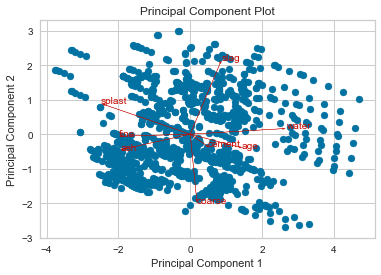

In [53]:
df = pd.read_csv('../data/concrete.csv')
target = "strength"
features = [
    'cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age'
]

# Extract the instance data and the target
X = df[features]
y = df[target]

visualizer = PCADecomposition(scale=True, proj_features=True)
visualizer.fit_transform(X, y)
visualizer.poof()

## ROCAUC

A ROCAUC (Receiver Operating Characteristic/Area Under the Curve) plot allows the user to visualize the tradeoff between the classifier’s sensitivity and specificity.

The Receiver Operating Characteristic (ROC) is a measure of a classifier’s predictive quality that compares and visualizes the tradeoff between the model’s sensitivity and specificity. When plotted, a ROC curve displays the true positive rate on the Y axis and the false positive rate on the X axis on both a global average and per-class basis. The ideal point is therefore the top-left corner of the plot: false positives are zero and true positives are one.

This leads to another metric, area under the curve (AUC), which is a computation of the relationship between false positives and true positives. The higher the AUC, the better the model generally is. However, it is also important to inspect the “steepness” of the curve, as this describes the maximization of the true positive rate while minimizing the false positive rate.

In [54]:
# Load the classification data set
data = pd.read_csv('../data/occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

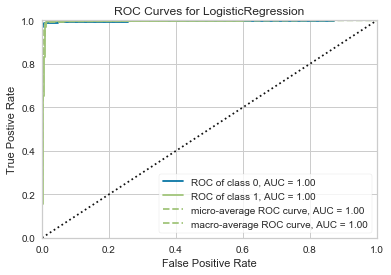

In [55]:
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model and visualizer
logistic = LogisticRegression()
visualizer = ROCAUC(logistic)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

## Evaluating Class Balance 

One of the biggest challenges for classification models is an imbalance of classes in the training data. Severe class imbalances may be masked by relatively good F1 and accuracy scores – the classifier is simply guessing the majority class and not making any evaluation on the underrepresented class.

There are several techniques for dealing with class imbalance such as stratified sampling, down sampling the majority class, weighting, etc. But before these actions can be taken, it is important to understand what the class balance is in the training data. The `ClassBalance` visualizer supports this by creating a bar chart of the support for each class, that is the frequency of the classes’ representation in the dataset.

In [56]:
# Load the classification data set
data = pd.read_csv('../data/occupancy.csv')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

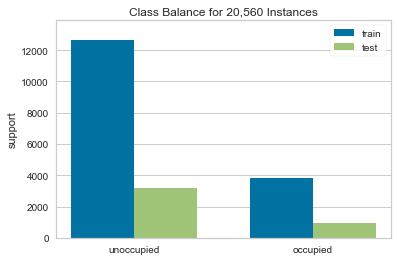

In [57]:
from yellowbrick.classifier import ClassBalance

# Instantiate the classification model and visualizer
visualizer = ClassBalance(labels=classes)

visualizer.fit(y_train, y_test)
visualizer.poof()

## Cluster Selection

### Elbow method

The `KElbowVisualizer` implements the “elbow” method to help select the optimal number of clusters by fitting the model with a range of values for K. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.

To demonstrate, in the following example the `KElbowVisualizer` fits the `KMeans` model for a range of K values from 2 to 10 on a sample two-dimensional dataset with 8 random clusters of points. When the model is fit with 8 clusters, we can see an “elbow” in the graph, which in this case we know to be the optimal number.

In [58]:
from sklearn.datasets.samples_generator import make_blobs

# Make 8 blobs dataset
X, y = make_blobs(centers=8)

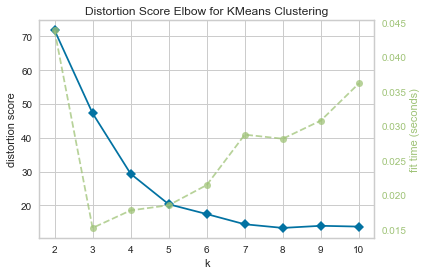

In [59]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model = KElbowVisualizer(KMeans(), k=10)
model.fit(X)
model.poof()

By default, the scoring parameter metric is set to `distortion`, which computes the sum of squared distances from each point to its assigned center. However, two other metrics can also be used with the`KElbowVisualizer` -- `silhouette` and `calinski_harabaz`. The `silhouette` score calculates the mean silhouette coefficient of all samples, while the `calinski_harabaz` score computes the ratio of dispersion between and within clusters.

The `KElbowVisualizer` also displays the amount of time to train the clustering model per K as a dashed green line, but is can be hidden by setting `timings=False`. 

### Silhouette analysis

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

- values near +1 indicate that the sample is far away from the neighboring clusters.
- value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters
- values near -1 indicate that those samples might have been assigned to the wrong cluster


The `SilhouetteVisualizer` displays the silhouette coefficient for each sample on a per-cluster basis, visualizing which clusters are dense and which are not. This is particularly useful for determining cluster imbalance, or for selecting a value for K by comparing multiple visualizers.

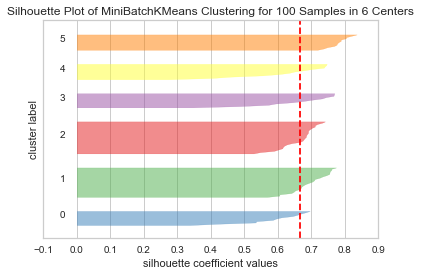

In [60]:
from sklearn.cluster import MiniBatchKMeans

# Instantiate the clustering model and visualizer
model = MiniBatchKMeans(6)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

### Intercluster Distance Maps

Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. Thus, the closer to centers are in the visualization, the closer they are in the original feature space. 

The clusters are sized according to a scoring metric, which by default is membership, i.e. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

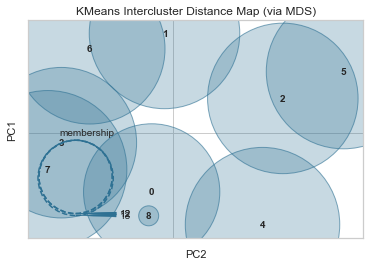

In [61]:
from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(KMeans(9))

visualizer.fit(X)
visualizer.poof()

---

## References

- [YellowBrick Model Selection Tutorial](http://www.scikit-yb.org/en/latest/tutorial.html)